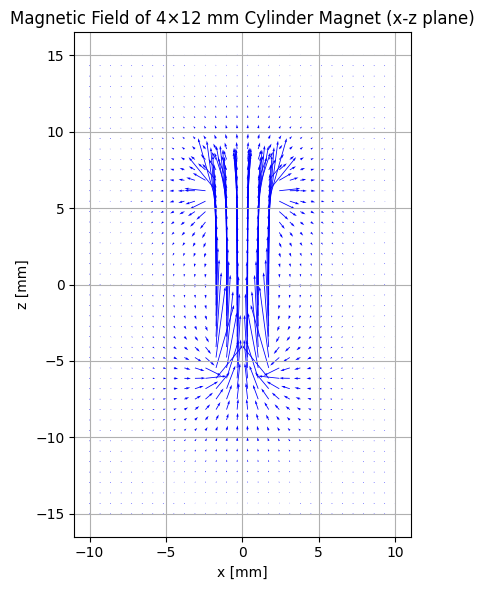

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import magpylib as mag

# 1. Define the cylindrical magnet (4 mm diameter, 12 mm height)
magnet = mag.magnet.Cylinder(
    magnetization=(0, 0, 1e5),  # A/m along z
    dimension=(4, 12)  # diameter=4mm, height=12mm
)

# 2. Create a grid of points in the x-z plane (y=0)
x = np.linspace(-10, 10, 30)  # mm
z = np.linspace(-15, 15, 45)  # mm
X, Z = np.meshgrid(x, z)
positions = np.stack((X.ravel(), np.zeros_like(X.ravel()), Z.ravel()), axis=1)

# 3. Compute B field at those positions
B = magnet.getB(positions)  # in mT
Bx = B[:, 0].reshape(X.shape)
Bz = B[:, 2].reshape(Z.shape)

# 4. Plot using quiver
plt.figure(figsize=(8, 6))
plt.quiver(X, Z, Bx, Bz, scale=0.5, color='blue')
plt.title('Magnetic Field of 4×12 mm Cylinder Magnet (x-z plane)')
plt.xlabel('x [mm]')
plt.ylabel('z [mm]')
plt.gca().set_aspect('equal')
plt.grid(True)
plt.tight_layout()
plt.show()

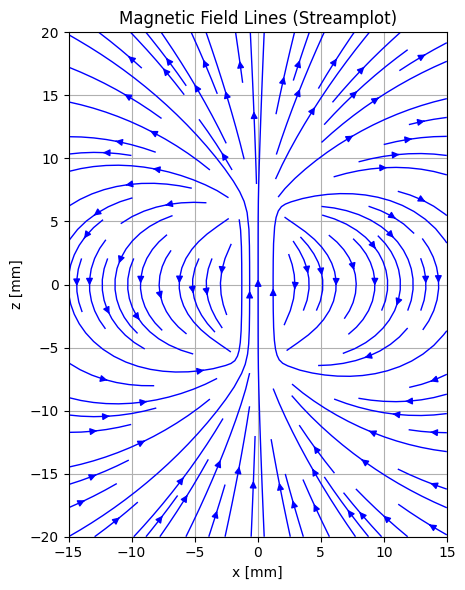

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import magpylib as mag

# Define magnet: 4 mm diameter, 12 mm height, magnetized along z
magnet = mag.magnet.Cylinder(
    magnetization=(0, 0, 1e5),  # A/m
    dimension=(4, 12)  # diameter, height in mm
)

# Create a grid in the x-z plane (y = 0)
x = np.linspace(-15, 15, 200)
z = np.linspace(-20, 20, 200)
X, Z = np.meshgrid(x, z)
positions = np.stack((X.ravel(), np.zeros_like(X.ravel()), Z.ravel()), axis=1)

# Get B field
B = magnet.getB(positions)
Bx = B[:, 0].reshape(X.shape)
Bz = B[:, 2].reshape(Z.shape)

# Plot field lines
plt.figure(figsize=(8, 6))
plt.streamplot(X, Z, Bx, Bz, color='blue', linewidth=1)
plt.title('Magnetic Field Lines (Streamplot)')
plt.xlabel('x [mm]')
plt.ylabel('z [mm]')
plt.gca().set_aspect('equal')
plt.grid(True)
plt.tight_layout()
plt.show()

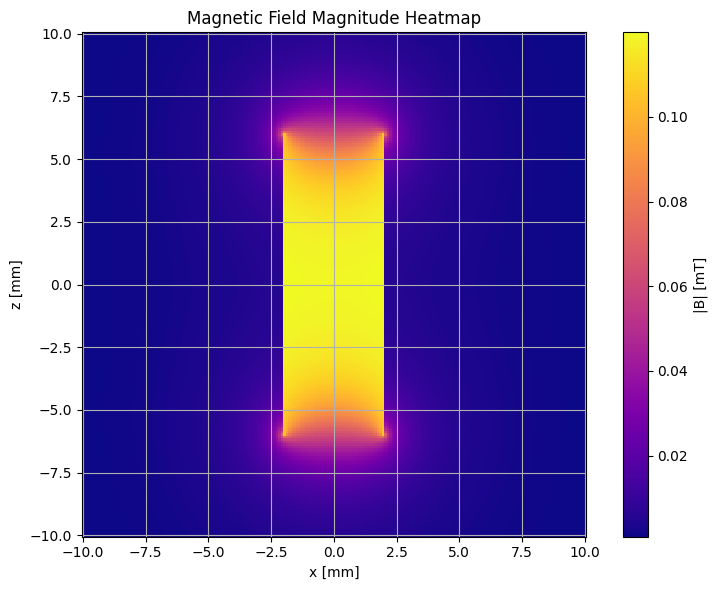

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import magpylib as mag

# Define magnet
magnet = mag.magnet.Cylinder(
    magnetization=(0, 0, 1e5),
    dimension=(4, 12)
)

# Grid in x-z plane
x = np.linspace(-10, 10, 200)
z = np.linspace(-10, 10, 200)
X, Z = np.meshgrid(x, z)
positions = np.stack((X.ravel(), np.zeros_like(X.ravel()), Z.ravel()), axis=1)

# Compute B field and magnitude
B = magnet.getB(positions)
B_mag = np.linalg.norm(B, axis=1).reshape(X.shape)  # magnitude in mT

# Plot heatmap
plt.figure(figsize=(8, 6))
hm = plt.pcolormesh(X, Z, B_mag, shading='auto', cmap='plasma')
plt.colorbar(hm, label='|B| [mT]')
plt.title('Magnetic Field Magnitude Heatmap')
plt.xlabel('x [mm]')
plt.ylabel('z [mm]')
plt.gca().set_aspect('equal')
plt.grid(True)
plt.tight_layout()
plt.show()

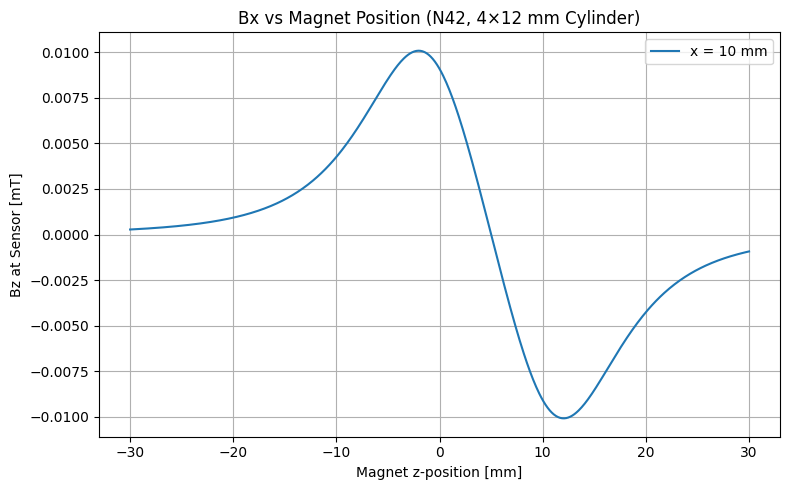

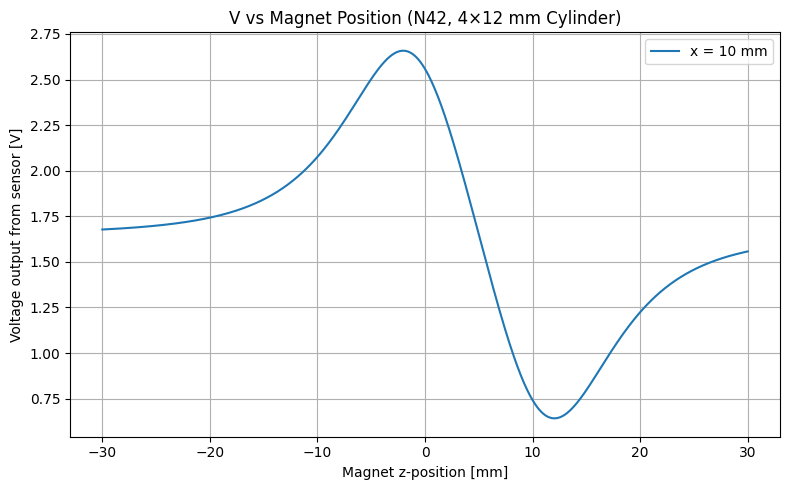

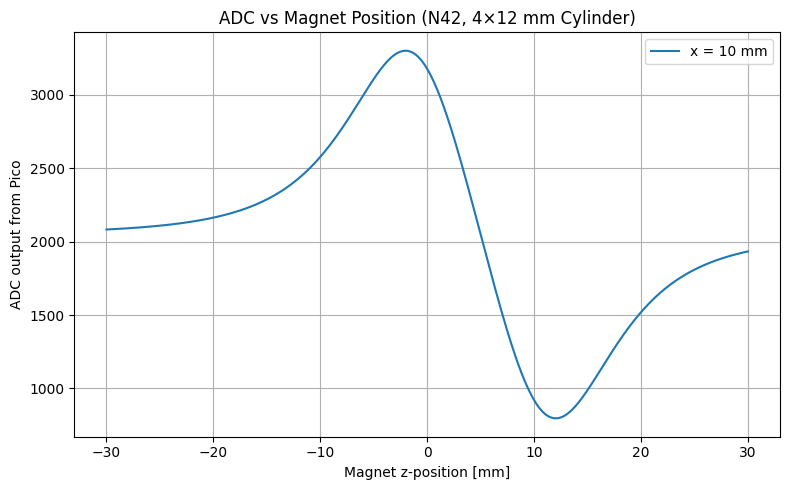

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import magpylib as mag

# Magnetization for N42 grade neodymium
Br = 1.3  # Tesla
mu0 = 4 * np.pi * 1e-7  # H/m
M = Br / mu0  # Magnetization in A/m for axial magnetization
# => ~1.035e6 A/m

# --- Configuration ---
x_sensor = 10  # mm offset from magnet center
z_sensor = 5 # mm offset from magnet center
z_range = np.linspace(-30, 30, 600)  # magnet Z positions (mm)
sensor_pos = np.array([x_sensor, 0, z_sensor])  # fixed target position

# --- Define magnet ---
magnet = mag.magnet.Cylinder(
    magnetization=(0, 0, M),  # axial (z-direction)
    dimension=(4, 12)  # diameter, height in mm
)

# --- Sweep and record Bz ---
Bx_values = []
V_values = []
ADC_values = []
for z_mag in z_range:
    magnet.position = (0, 0, z_mag)  # move along z
    B = magnet.getB(sensor_pos)  # mT
    Bx_values.append(B[0])
    V_values.append(B[0] * 100 + 3.3 / 2)  # convert to Tesla for voltage calculation
    ADC_values.append((B[0] * 100 + 3.3 / 2) / (3.3 / 4096))  # convert to ADC value

# --- Plot ---
plt.figure(figsize=(8, 5))
plt.plot(z_range, Bx_values, label=f'x = {x_sensor} mm', color='C0')
plt.title('Bx vs Magnet Position (N42, 4×12 mm Cylinder)')
plt.xlabel('Magnet z-position [mm]')
plt.ylabel('Bz at Sensor [mT]')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(z_range, V_values, label=f'x = {x_sensor} mm', color='C0')
plt.title('V vs Magnet Position (N42, 4×12 mm Cylinder)')
plt.xlabel('Magnet z-position [mm]')
plt.ylabel('Voltage output from sensor [V]')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(z_range, ADC_values, label=f'x = {x_sensor} mm', color='C0')
plt.title('ADC vs Magnet Position (N42, 4×12 mm Cylinder)')
plt.xlabel('Magnet z-position [mm]')
plt.ylabel('ADC output from Pico')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()